In [3]:
pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


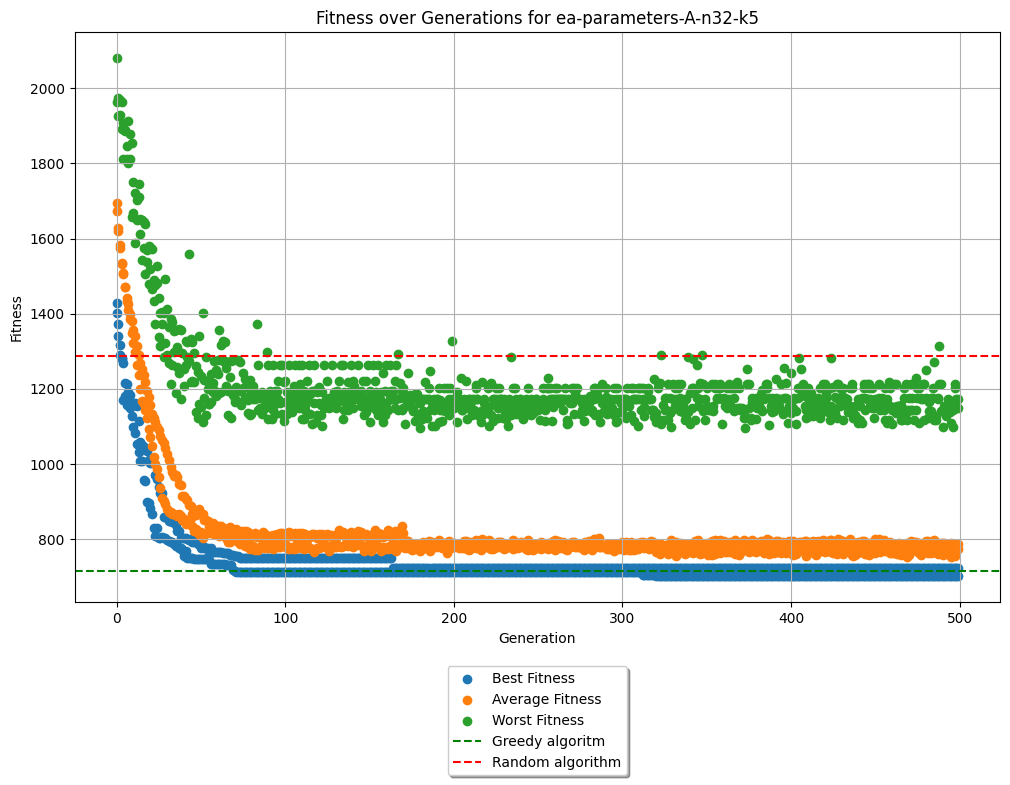

In [27]:

import matplotlib.pyplot as plt
import pandas as pd
import os

# List of CSV file paths or a directory containing CSV files
csv_files = {
    'ea-parameters-A-n32-k5': {
        'greedy':713,
        'random': 1286
    }
}

# Loop through each CSV file and plot the data
for csv_file_path in csv_files.keys():

    plt.figure(figsize=(12, 8))

    # Read the CSV data into a pandas DataFrame
    df = pd.read_csv(csv_file_path, sep=";")

    # Group by 'configuration' and plot
    #for config, group in df.groupby('configuration'):
    configuration = "population: 300, generations: 500, selection: tournament of 5, mutation: swap, crossover: ordered, cross_pob: 0.7, mut prob: 0.5"
    group = df[df['configuration'] == configuration]
   
    plt.scatter(group['generation'], group['best_fitness'], label=f'Best Fitness', marker='o')
    plt.scatter(group['generation'], group['average_fitness'], label=f'Average Fitness', marker='o')
    plt.scatter(group['generation'], group['worst_fitness'], label=f'Worst Fitness', marker='o')



    #plt.plot()
    plt.axhline(y=csv_files[csv_file_path]["greedy"], color='green', linestyle='--', label=f'Greedy algoritm')
    plt.axhline(y=csv_files[csv_file_path]["random"], color='red', linestyle='--', label=f'Random algorithm')
# Add titles and labels
    plt.title(f'Fitness over Generations for {csv_file_path}')
    plt.xlabel('Generation')
    plt.ylabel('Fitness')

# Move the legend to the right of the plot
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)
# Show grid
    plt.grid(True)

# Adjust layout to make room for the legend on the right
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin to fit the legend

# Show the plot
    plt.show()

In [2]:
print(df.columns)

Index(['iteration;tabu_size;best_fitness;average_fitness;worst_fitness;current_fitness'], dtype='object')


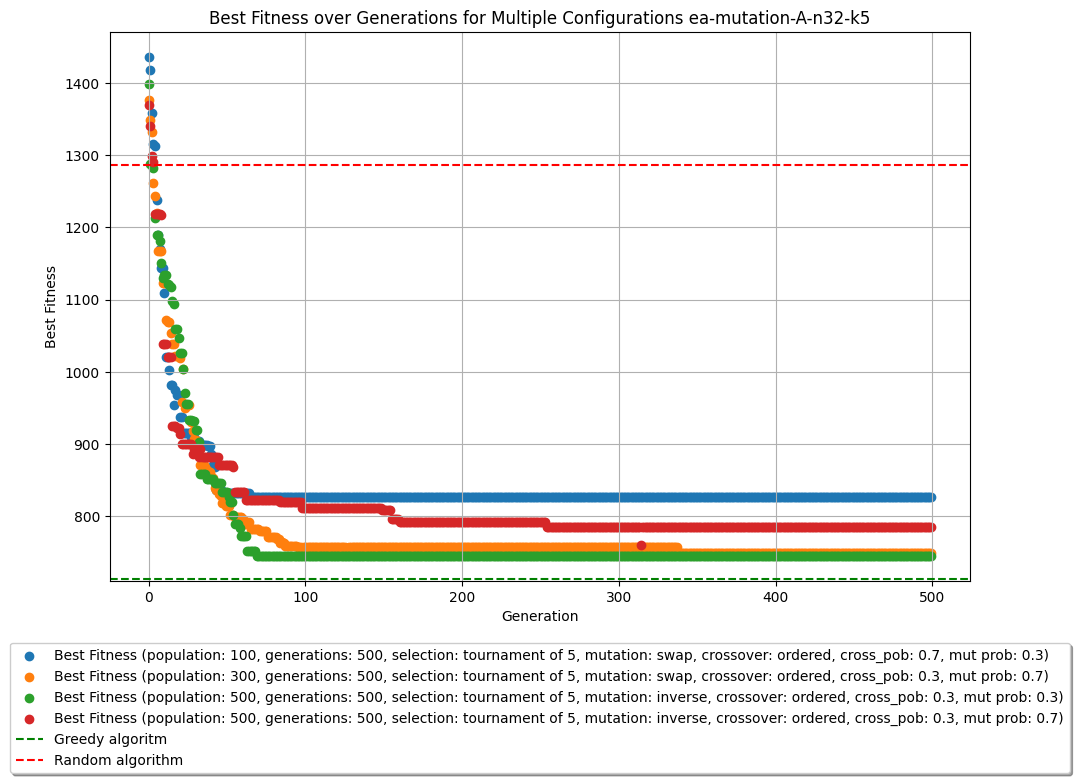

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import os

# List of CSV file paths or a directory containing CSV files
csv_files = {
    # 'ea-parameters-A-n32-k5': {
    #     'greedy':713,
    #     'random': 1286
    # },
    # 'ea-parameters-A-n37-k5':{
    #     'greedy':847,
    #     'random': 1528
    # },
    # 'ea-parameters-A-n39-k5':{
    #     'greedy':953,
    #     'random': 1550
    # },
    # 'ea-parameters-A-n45-k7':{
    #     'greedy':1288,
    #     'random': 2093
    # },
    # 'ea-parameters-A-n48-k7':{
    #     'greedy':1259,
    #     'random': 2342
    # },
    # 'ea-parameters-A-n54-k7':{
    #     'greedy':713,
    #     'random': 1286
    # },
    # 'ea-parameters-A-n60-k9':{
    #     'greedy':713,
    #     'random': 1286
    # },
    # 'ea-crossover-A-n32-k5':{
    #     'greedy':713,
    #     'random': 1286
    # },
    'ea-mutation-A-n32-k5':{
        'greedy':713,
        'random': 1286
    },
}

# Alternatively, if you have a directory
# csv_directory = 'path_to_your_directory'
# csv_files = [os.path.join(csv_directory, f) for f in os.listdir(csv_directory) if f.endswith('.csv')]

# Create a figure for plotting

# Loop through each CSV file and plot the data
for csv_file_path in csv_files.keys():

    plt.figure(figsize=(12, 8))

    # Read the CSV data into a pandas DataFrame
    df = pd.read_csv(csv_file_path, sep=";")

    # Group by 'configuration' and plot
    for config, group in df.groupby('configuration'):
        plt.scatter(group['generation'], group['best_fitness'], label=f'Best Fitness ({config})', marker='o')

    #plt.plot()
    plt.axhline(y=csv_files[csv_file_path]["greedy"], color='green', linestyle='--', label=f'Greedy algoritm')
    plt.axhline(y=csv_files[csv_file_path]["random"], color='red', linestyle='--', label=f'Random algorithm')
# Add titles and labels
    plt.title(f'Best Fitness over Generations for Multiple Configurations {csv_file_path}')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness')

# Move the legend to the right of the plot
#plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fancybox=True, shadow=True)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), fancybox=True, shadow=True, ncol=1)
# Show grid
    plt.grid(True)

# Adjust layout to make room for the legend on the right
    plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the right margin to fit the legend

# Show the plot
    plt.show()

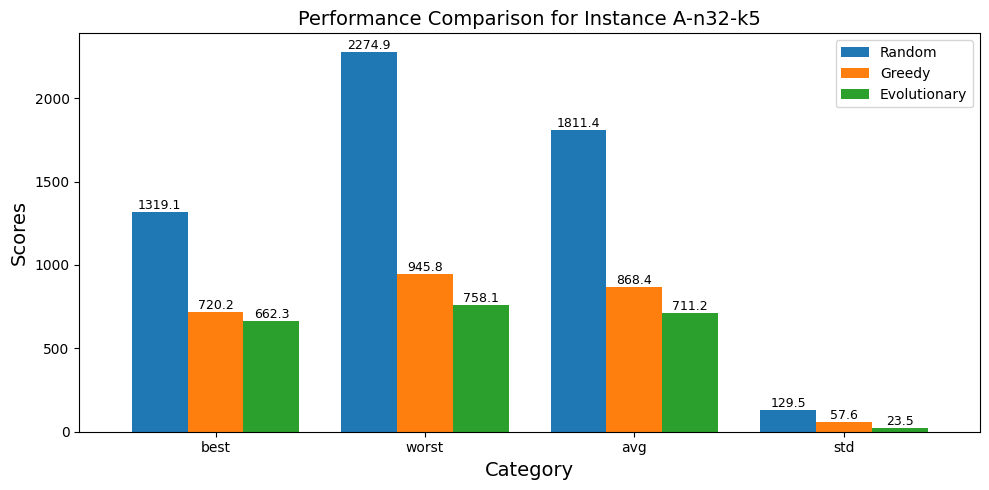

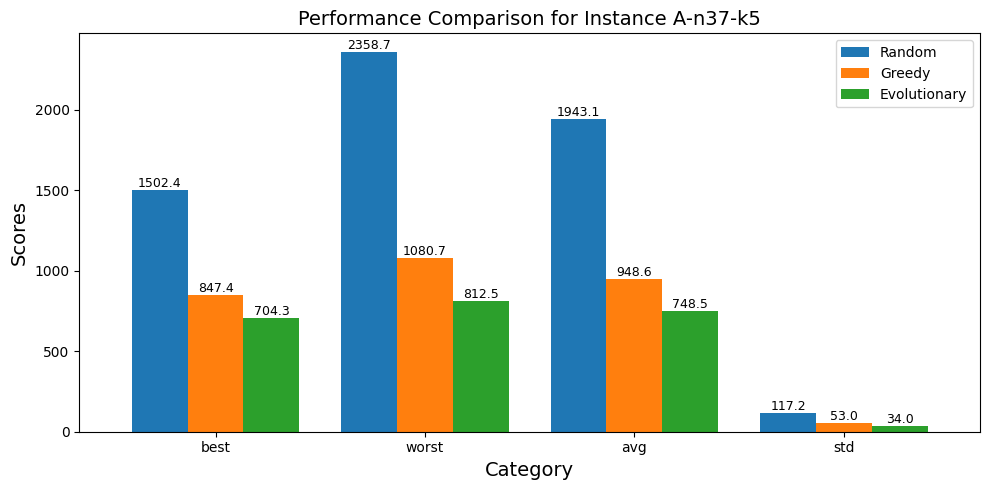

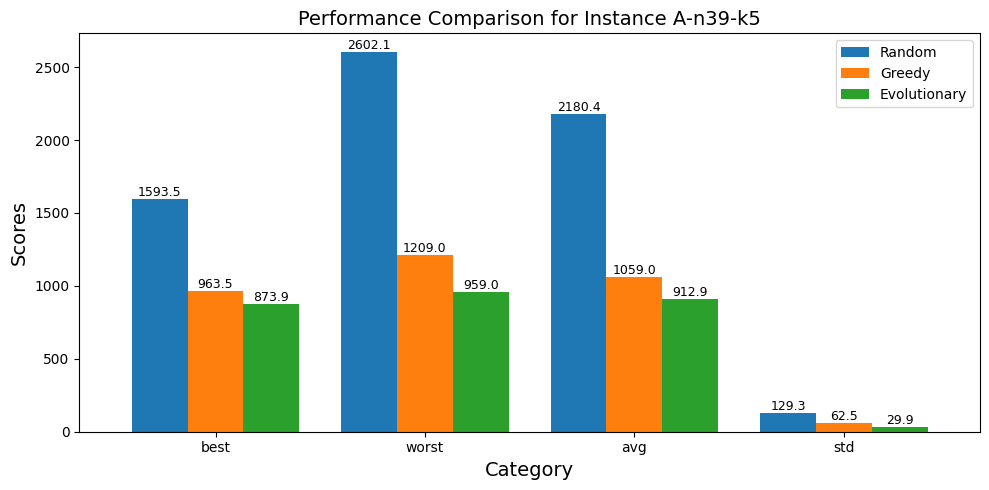

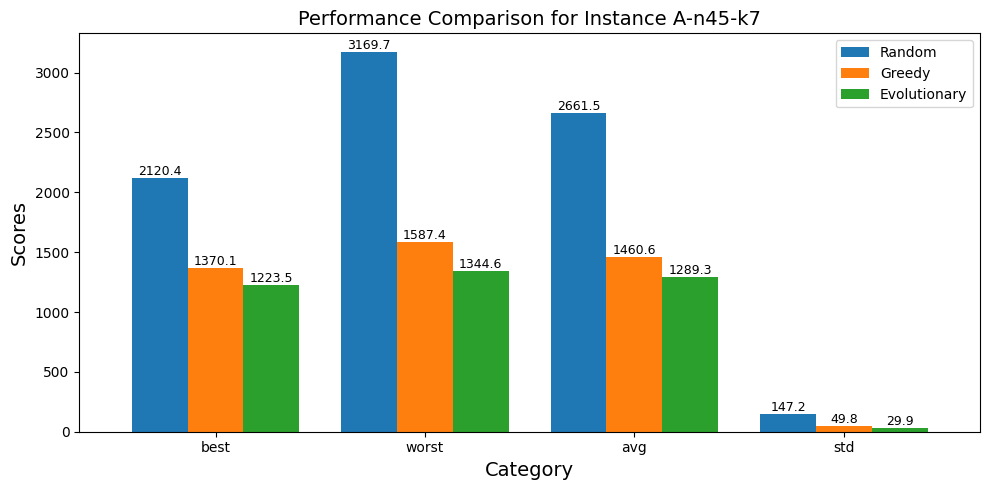

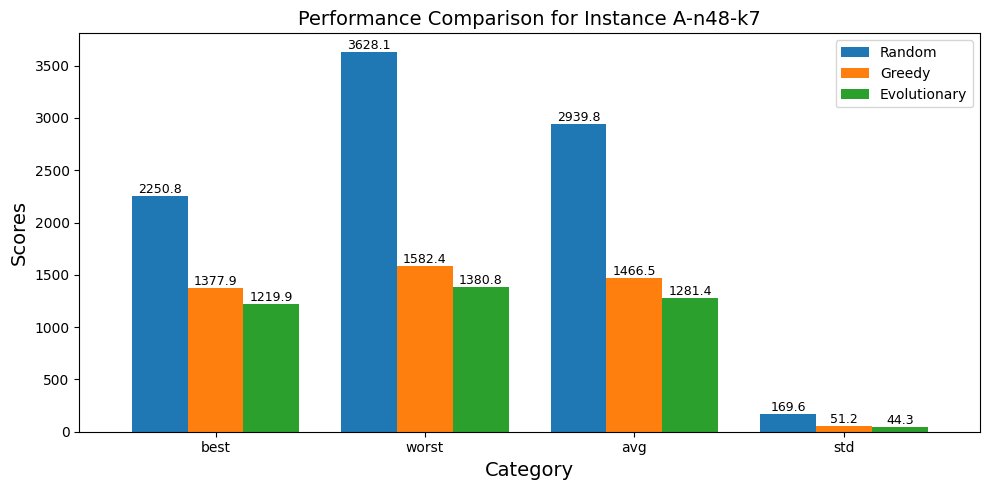

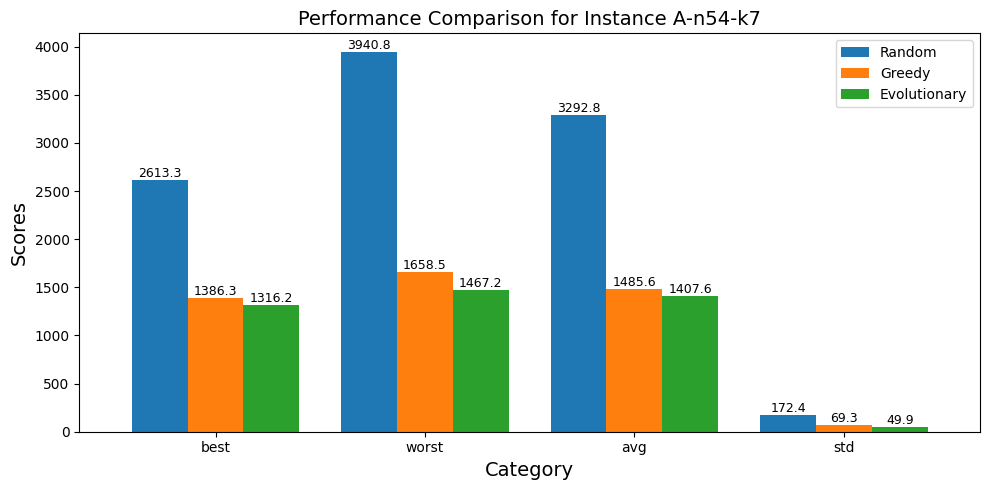

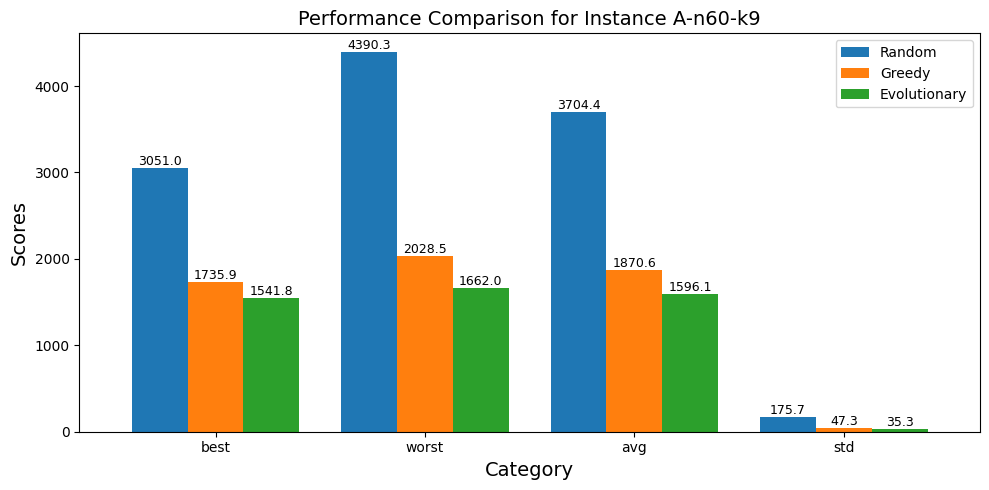

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from a CSV file
df = pd.read_csv('comparisons-greedy-fix2.csv', sep=";")

# Set the instance number as the index
df.set_index('Instance', inplace=True)

# Define algorithms and their corresponding metrics
algorithms = ['Random', 'Greedy', 'Evolutionary']
metrics = ['best', 'worst', 'avg', 'std']

# Loop through each instance and create a separate chart
for index, row in df.iterrows():
    # Prepare data for the current instance
    plot_data = {}
    
    # Group results by algorithm for the current row
    for algo in algorithms:
        algo_data = {}
        for metric in metrics:
            column_name = f"{algo}: {metric}"
            algo_data[metric] = row[column_name]
        plot_data[algo] = algo_data

    # Convert to DataFrame for easier plotting
    plot_df = pd.DataFrame(plot_data)

    # Create a bar plot
    ax = plot_df.plot(kind='bar', figsize=(10, 5), width=0.8)

    # Customize the plot
    ax.set_title(f'Performance Comparison for Instance {index}', fontsize=14)
    ax.set_ylabel('Scores', fontsize=14)
    ax.set_xlabel('Category', fontsize=14)
    plt.xticks(rotation=0)

    # Show the values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=9)

    # Show the plot
    plt.tight_layout()
    plt.show()